In [1]:
import matplotlib.pyplot as plt

import astropy.units as u

In [ ]:
import lalsimulation.gwsignal.core.parameter_conventions as pc

# -- Make sure mass1 and mass2 are not in default_dict
pc.default_dict.pop('mass1', None)
pc.default_dict.pop('mass2', None);

In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET

plt.style.use(PLOT_STYLE_SHEET)

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


# Derivative Tutorial

<!-- ## Built-In Derivative Functionality -->
## Derivative Logic

TODO: make this one shorter, more pedagogical? And include guide for custom derivs? And then the derivative_tests notebook is for consistency tests

The default way that derivatives are calculated in `gw-signal-tools` is through the ``WaveformDerivative`` class located in the `~gw_signal_tools.waveform.deriv` package.
This class acts as a wrapper to several different routines for the actual calculation, but all of them follow the same logic which we will now introduce.

implements a mix of numerical and analytical (if known) derivatives

### Task/Goal

Let us calculate the derivative with respect to the chirp mass.

In [3]:
param_to_vary = 'chirp_mass'

### Ingredient No. 1

The first thing we need is a waveform generator for which derivative shall be calculated.

In [4]:
from gw_signal_tools.waveform import get_wf_generator

The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


In [5]:
# -- Define the approximant
approximant = 'IMRPhenomXPHM'
# approximant = 'SEOBNRv4'

# -- Initialize the generator
wf_generator = get_wf_generator(approximant)

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


### Ingredient No. 2

Point

In [ ]:
f_min = 20.0 * u.Hz
f_max = 1024.0 * u.Hz
delta_f = 2**-8 * u.Hz
delta_t = 1.0 / 4096.0 * u.s
f_ref = f_min  # Frequency where we specify spins

wf_params = {
    'chirp_mass': 30.0 * u.solMass,
    'mass_ratio': 0.42 * u.dimensionless_unscaled,
    'deltaT': delta_t,
    'f22_start': f_min,
    'deltaF': delta_f,
    'f_max': f_max,
    'f22_ref': f_ref,
    'phi_ref': 0.0 * u.rad,
    'distance': 440.0 * u.Mpc,
    'inclination': 0.0 * u.rad,
    'condition': 0,
}

### Ingredient No. 3

function to call. ``WaveformDerivative`` class

In [7]:
from gw_signal_tools.waveform import WaveformDerivative

In [8]:
deriv = WaveformDerivative(
    wf_params,
    param_to_vary,
    wf_generator,
)

num_deriv, info_dict = deriv(), deriv.deriv_info
# -- `deriv.deriv` would be equivalent to `deriv()`

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

### Results

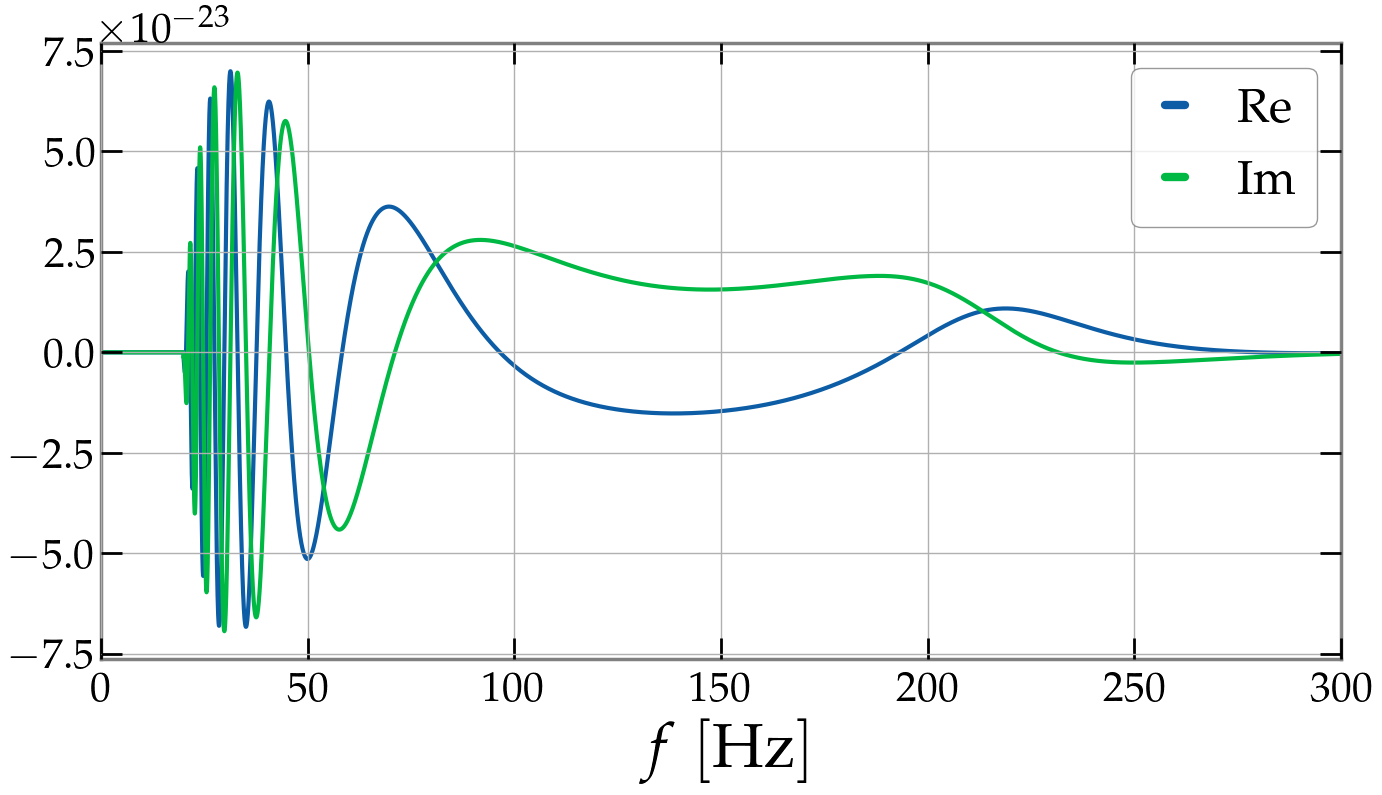

In [9]:
plt.figure(figsize=(16, 8))

plt.plot(num_deriv.real, label=r'$\mathrm{Re}$')
plt.plot(num_deriv.imag, label=r'$\mathrm{Im}$')


plt.xlim(0, 300)
# plt.xlim(f_min.to_value(u.Hz), 100)

plt.xlabel(r'$f \; [\mathrm{Hz}]$')
plt.legend()


plt.show()

Useful information about the computation is made available from the output of `numdifftools`.

In [10]:
info_dict

{'f_value': <FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j,
                   0.+0.j]
                  unit=Unit("s strain"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.00390625 Hz>,
                  epoch=<Time object: scale='utc' format='gps' value=0.0>,
                  name='hplus',
                  channel=None)>,
 'error_estimate': <FrequencySeries([0., 0., 0., ..., 0., 0., 0.]
                  unit=Unit("s strain / solMass"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.00390625 Hz>,
                  epoch=None,
                  name=None,
                  channel=None)>,
 'final_step': array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
        0.00810209, 0.00810209], shape=(262145,)),
 'index': array([1310725, 1310726, 1310727, ..., 1572867, 1572868,
        1572869], shape=(262145,))}

All of them are also available as attributes of the class instance, once the derivative is calculated.

In [11]:
deriv.final_step

array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
       0.00810209, 0.00810209], shape=(262145,))

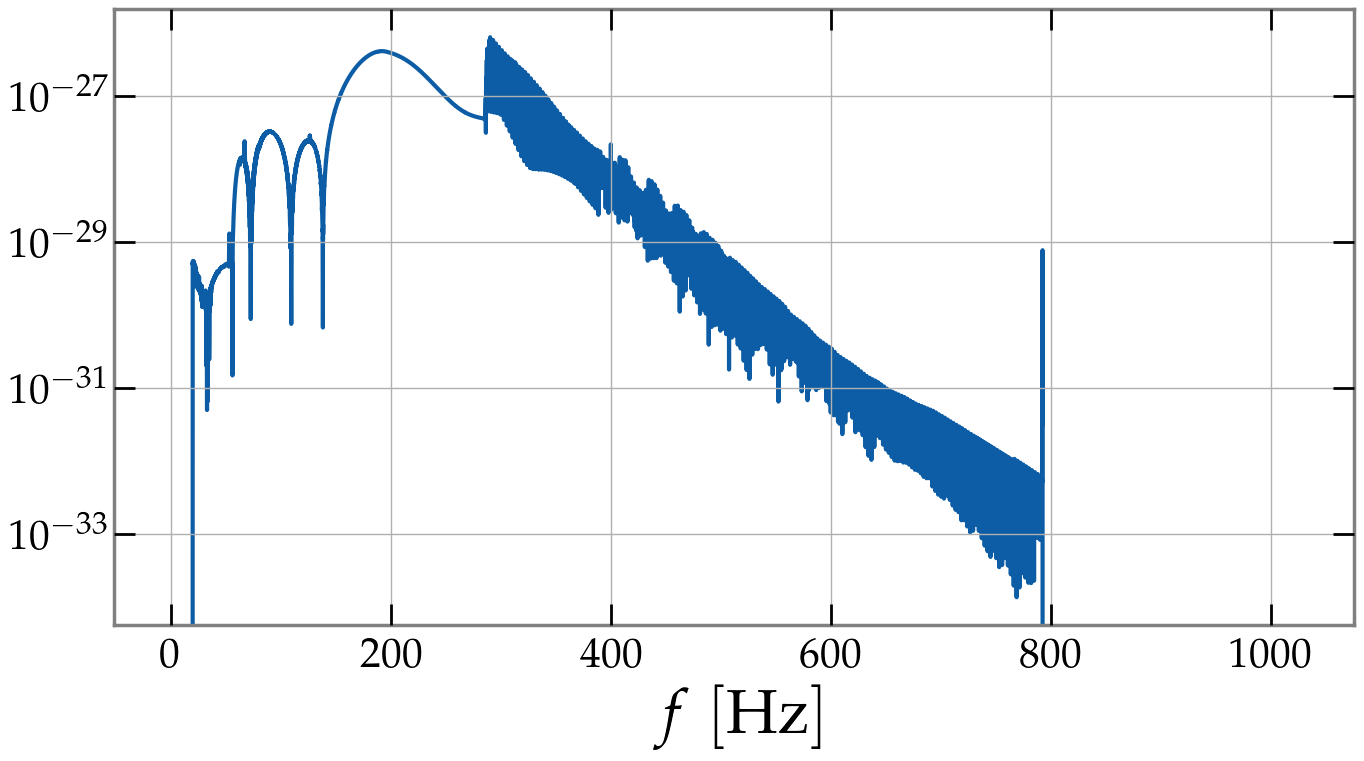

In [12]:
plt.figure(figsize=(16, 8))

plt.plot(deriv.error_estimate)


plt.xlabel(r'$f \; [\mathrm{Hz}]$')

plt.yscale('log')


plt.show()

## Custom Waveform Derivatives

Now that we know what is needed to compute a derivative, we can think beyond the existing capabilities of `gw-signal-tools` in that regard.
In other words, we can now think about creating custom derivative routines.
This is useful in case you intend to use a waveform model with known derivatives or one that allows for more efficient computations (e.g., via autodifferentiation).

Thanks to the internal logic of `gw-signal-tools`, this is rather easy to achieve.
Just create a new class (that inherits from the ``WaveformDerivativeBase`` class or at least has the proper logic used by upstream operations) and pass it to the `deriv_routine` argument of the ``WaveformDerivative`` class.
This class is used in all Fisher matrix routines etc., so passing `deriv_routine = ...` to the `FisherMatrix` class also works.


Let's demonstrate this functionality in a semi-realistic example.
One avenue you might want to pursue, using only existing `gw-signal-tools` code, is applying different differentiation techniques for different parameters, e.g., using `numdifftools` for the total mass and `amplitude_phase` for the mass ratio.
In that case, since both have `param_to_vary` as their second argument, one can achieve this as follows:

In [13]:
from gw_signal_tools.waveform.deriv import (
    WaveformDerivativeBase,
    WaveformDerivativeNumdifftools,
    WaveformDerivativeAmplitudePhase,
)
from gw_signal_tools.types import WFGen


class CustomDerivative(WaveformDerivativeBase):
    def __new__(
        cls,
        point: dict[str, u.Quantity],
        param_to_vary: str,
        wf_generator: WFGen,
        *args,
        **kwds,
    ) -> None:
        if param_to_vary == 'total_mass':
            routine = WaveformDerivativeNumdifftools
        elif param_to_vary == 'mass_ratio':
            routine = WaveformDerivativeAmplitudePhase
        else:
            raise ValueError(
                f'Parameter {param_to_vary} not supported in CustomDerivative'
            )

        return routine(
            point=point,
            param_to_vary=param_to_vary,
            wf_generator=wf_generator,
            *args,
            **kwds,
        )

In [14]:
print(
    isinstance(
        CustomDerivative(
            {'total_mass': 30 * u.Msun, 'mass_ratio': 0.5 * u.dimensionless_unscaled},
            'total_mass',
            wf_generator,
        ),
        WaveformDerivativeNumdifftools,
    ),
    isinstance(
        CustomDerivative(
            {'total_mass': 30 * u.Msun, 'mass_ratio': 0.5 * u.dimensionless_unscaled},
            'mass_ratio',
            wf_generator,
        ),
        WaveformDerivativeAmplitudePhase,
    ),
)

# -- Note: we do not pass a full point here, only the relevant parameters.
# -- This works because we do not actually call the derivative here.

True True


This can be called through `WaveformDerivative` as follows

In [15]:
WaveformDerivative(
    {'total_mass': 30 * u.Msun, 'mass_ratio': 0.5 * u.dimensionless_unscaled},
    'total_mass',
    wf_generator,
    deriv_routine=CustomDerivative,
)

Alternatively, you can do the following:

In [16]:
WaveformDerivative.deriv_routine_class_map['custom_routine'] = CustomDerivative

WaveformDerivative(
    {'total_mass': 30 * u.Msun, 'mass_ratio': 0.5 * u.dimensionless_unscaled},
    'mass_ratio',
    wf_generator,
    deriv_routine='custom_routine',
)

Here we use the fact that ``WaveformDerivative``, if presented with string input for `deriv_routine`, gets the class it calls from its `deriv_routine_class_map` attribute.